In [1]:
import pandas as pd

In [2]:
A=pd.read_csv("F:/data science workshop/DATA-SET/data/Credit.csv")

In [3]:
A.head()

,Unnamed: 0,ID,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
0,1,1,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333
1,2,2,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903
2,3,3,104.593,7075,514,4,71,11,Male,No,No,Asian,580
3,4,4,148.924,9504,681,3,36,11,Female,No,No,Asian,964
4,5,5,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331


In [4]:
import seaborn as sb

In [5]:
import matplotlib.pyplot as plt

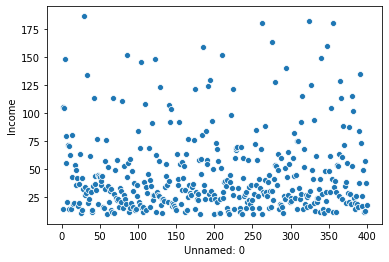

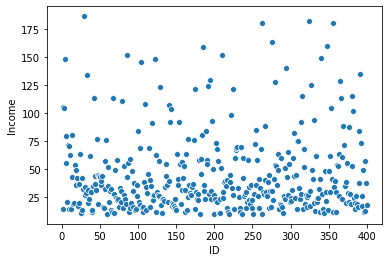

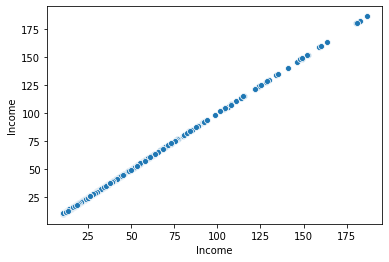

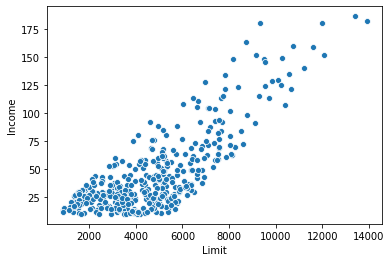

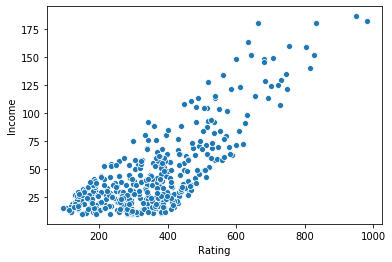

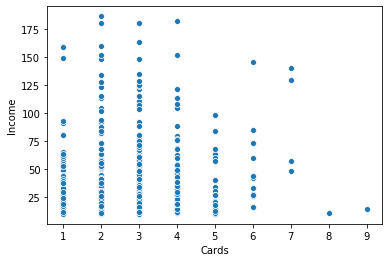

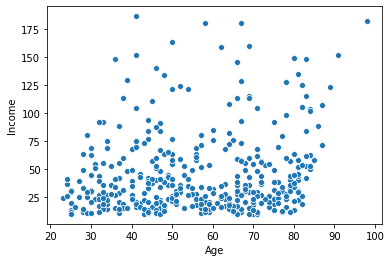

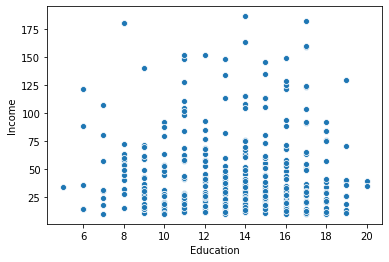

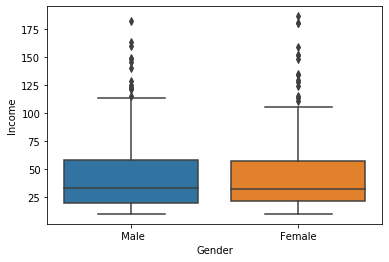

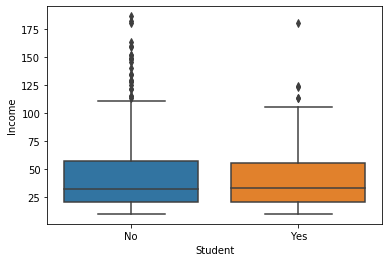

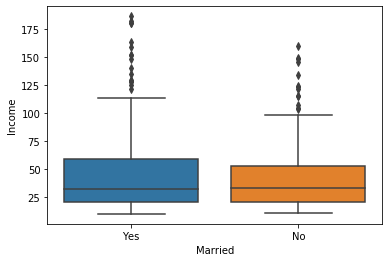

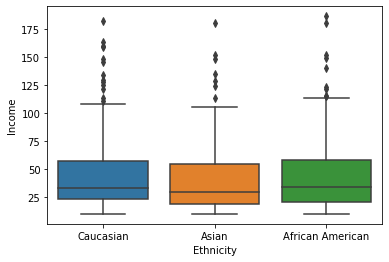

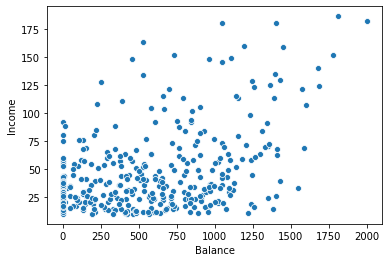

In [9]:
cat=[]
con=[]
for i in A.columns:
    if(A[i].dtypes=="object"):
        sb.boxplot(A[i],A.Income)
        plt.show()
    else:
        sb.scatterplot(A[i],A.Income)
        plt.show()

In [7]:
cat

['Gender', 'Student', 'Married', 'Ethnicity']

In [8]:
con

['Unnamed: 0',
 'ID',
 'Income',
 'Limit',
 'Rating',
 'Cards',
 'Age',
 'Education',
 'Balance']

In [10]:
from sklearn.preprocessing import LabelEncoder

In [11]:
le=LabelEncoder()

In [12]:
B=A.apply(le.fit_transform)

In [13]:
B

,Unnamed: 0,ID,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
0,0,0,43,131,99,1,11,6,0,0,1,2,67
1,1,1,366,317,219,2,59,10,1,1,1,1,196
2,2,2,365,328,231,3,48,6,0,0,0,1,126
3,3,3,388,369,265,2,13,6,1,0,0,1,210
4,4,4,294,215,143,1,45,11,0,0,1,2,66
...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,395,395,21,162,115,2,9,8,0,0,1,2,120
396,396,396,28,147,108,4,42,12,0,0,0,0,103
397,397,397,299,166,123,4,44,7,1,0,1,2,25
398,398,398,227,64,45,0,21,8,0,0,1,2,0


In [14]:
B=B.drop(labels="Unnamed: 0",axis=1)

In [15]:
B

,ID,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
0,0,43,131,99,1,11,6,0,0,1,2,67
1,1,366,317,219,2,59,10,1,1,1,1,196
2,2,365,328,231,3,48,6,0,0,0,1,126
3,3,388,369,265,2,13,6,1,0,0,1,210
4,4,294,215,143,1,45,11,0,0,1,2,66
...,...,...,...,...,...,...,...,...,...,...,...,...
395,395,21,162,115,2,9,8,0,0,1,2,120
396,396,28,147,108,4,42,12,0,0,0,0,103
397,397,299,166,123,4,44,7,1,0,1,2,25
398,398,227,64,45,0,21,8,0,0,1,2,0


In [43]:
X=B[["Limit","Rating","Age","Education","Gender","Balance"]]
Y=B[["Income"]]

In [44]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.2,random_state=30)

In [25]:
from sklearn.neighbors import KNeighborsRegressor

In [26]:
kr=KNeighborsRegressor(n_neighbors=5)

In [27]:
model=kr.fit(xtrain,ytrain)

In [28]:
pred=model.predict(xtest)

In [30]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [31]:
mean_absolute_error(ytest,pred)

38.6475

In [45]:
for i in range(2,20):
    knr=KNeighborsRegressor(n_neighbors=i)
    model=kr.fit(xtrain,ytrain)
    pred=model.predict(xtest)
    print(i ,mean_squared_error(ytest,pred))

2 2827.3605
3 2827.3605
4 2827.3605
5 2827.3605
6 2827.3605
7 2827.3605
8 2827.3605
9 2827.3605
10 2827.3605
11 2827.3605
12 2827.3605
13 2827.3605
14 2827.3605
15 2827.3605
16 2827.3605
17 2827.3605
18 2827.3605
19 2827.3605


In [46]:
for i in range(10,50,10):
    xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.2,random_state=i)
    for j in range(2,15,1):
        knn=KNeighborsRegressor(n_neighbors=j)
        model=knn.fit(xtrain,ytrain)
        pred=model.predict(xtest)
        print(i,j,mean_squared_error(ytest,pred))

10 2 3868.003125
10 3 3913.8097222222227
10 4 3720.7640625
10 5 3769.8240000000005
10 6 3951.1645833333328
10 7 3744.5375
10 8 3651.7427734375
10 9 3676.630401234567
10 10 3690.01075
10 11 3688.3921487603307
10 12 3747.1330729166666
10 13 3685.480103550296
10 14 3651.2125637755103
20 2 3534.35
20 3 3622.5208333333335
20 4 3689.7703125
20 5 3602.6195
20 6 3692.515972222222
20 7 3601.3632653061227
20 8 3740.8845703125
20 9 3724.8513888888892
20 10 3940.383625
20 11 3873.1549586776864
20 12 3917.5939236111108
20 13 3940.65724852071
20 14 3926.091262755102
30 2 3555.53125
30 3 2991.6305555555555
30 4 2885.86328125
30 5 2827.3605
30 6 2680.8243055555554
30 7 2740.0760204081635
30 8 2766.1619140625
30 9 2793.1126543209875
30 10 2847.8347499999995
30 11 2923.261260330579
30 12 2863.544184027778
30 13 2935.942159763313
30 14 3088.862818877551
40 2 3323.49375
40 3 3017.0333333333338
40 4 3005.1890625
40 5 2889.2000000000003
40 6 2937.401736111111
40 7 2765.6961734693878
40 8 2973.8685546875
40 

In [47]:
from sklearn.model_selection import GridSearchCV

In [48]:
from sklearn.neighbors import KNeighborsRegressor

In [49]:
kr=KNeighborsRegressor()

In [50]:
tp={"n_neighbors":range(2,20)}
gcv=GridSearchCV(knr,tp,scoring="neg_mean_squared_error",cv=4)

In [51]:
gcvmodel=gcv.fit(xtrain,ytrain)

In [52]:
gcvmodel.best_params_

{'n_neighbors': 7}